### Loading Packages

In [1]:
library(foreign)
library(ooc)
library(ggplot2)
library(viridis)
library(weights)
library(xtable)
library(nnet)
library(effects)
library(corrplot)
library(ggrepel)
library(scales)
library(reshape)
library(MCMCpack)
library(apsrtable)
library(gplots)
library(statar)
library(gridExtra)

Loading required package: oc
Loading required package: pscl
Classes and Methods for R developed in the
Political Science Computational Laboratory
Department of Political Science
Stanford University
Simon Jackman
hurdle and zeroinfl functions by Achim Zeileis

## Optimal Classification Ideal Point Package
## Copyright 2007 -2018
## Keith Poole, Jeffrey Lewis, James Lo, and Royce Carroll
## Support provided by the U.S. National Science Foundation
## NSF Grant SES-0611974

Loading required package: MCMCpack
Loading required package: coda
Loading required package: MASS
##
## Markov Chain Monte Carlo Package (MCMCpack)
## Copyright (C) 2003-2018 Andrew D. Martin, Kevin M. Quinn, and Jong Hee Park
##
## Support provided by the U.S. National Science Foundation
## (Grants SES-0350646 and SES-0350613)
##
Loading required package: aspace
Loading required package: splancs
Loading required package: sp

Spatial Point Pattern Analysis Code in S-Plus
 
 Version 2 - Spatial and Space-Time analysis


A

### Loading Data

In [2]:
set.seed(1985)

In [3]:
CCES2015 <- read.dta("/Users/tpliu/Desktop/Projects/ooc/Data/CCES15_UGA_OUTPUT_Jan2016.dta",convert.factors = FALSE)

Warning message in strptime(xx, f <- "%Y-%m-%d %H:%M:%OS", tz = tz):
“unknown timezone 'zone/tz/2018c.1.0/zoneinfo/Asia/Taipei'”

### Calculating the Number of Respondents---$n$

In [4]:
nresp.CCES2015 <- nrow(CCES2015)

### I. POLITICAL IDENTIFICATION AND SOPHISTICATION VARIABLES

#### Party ID

In [5]:
partyid <- CCES2015$pid7
partyid[partyid < 1 | partyid > 7] <- NA

#### Ideology

In [6]:
ideology <- CCES2015$CC15_340a
ideology[ideology < 1 | ideology > 7] <- NA

#### Social Wellfare Ideology

In [7]:
socialideology <- CCES2015$UGA310A
socialideology[socialideology < 1 | socialideology > 7] <- NA

#### Economic Ideology

In [8]:
economicideology <- CCES2015$UGA310B
economicideology[economicideology < 1 | economicideology > 7] <- NA

#### National Security Ideology

In [9]:
natsecurityideology <- CCES2015$UGA310C
natsecurityideology[natsecurityideology < 1 | natsecurityideology > 7] <- NA

#### Vote Choice in 2012

In [10]:
voted2012 <- CCES2015$CC15_315
voted2012[CCES2015$CC15_315==4] <- 1
voted2012[CCES2015$CC15_315==5] <- 1
voted2012[CCES2015$CC15_315==1] <- 2
voted2012[CCES2015$CC15_315==2] <- 2
voted2012[CCES2015$CC15_315==3] <- 2
voted2012[voted2012 < 1 | voted2012 > 2] <- NA

#### Vote Choice in 2012 (Vote for Romney)

In [11]:
romneyvote <- CCES2015$CC15_315
romneyvote[romneyvote > 2] <- NA

#### Opinion on the Tea Party

In [12]:
teapartypositive <- CCES2015$UGA305E
teapartypositive[teapartypositive > 100] <- NA
teapartypositive[teapartypositive >= 0 & teapartypositive <= 15] <- 1
teapartypositive[teapartypositive >= 16 & teapartypositive <= 35] <- 2
teapartypositive[teapartypositive >= 36 & teapartypositive <= 55] <- 3
teapartypositive[teapartypositive >= 56 & teapartypositive <= 85] <- 4
teapartypositive[teapartypositive >= 86 & teapartypositive <= 100] <- 5

#### Interest in News

In [13]:
news_interest <- CCES2015$newsint
news_interest[news_interest > 4] <- NA
news_interest <- -1 * (news_interest - 5)

#### Knowledge regardgin the House

In [14]:
knowledge_correcthouse <- CCES2015$CC15_310a
knowledge_correcthouse <- knowledge_correcthouse + 1
knowledge_correcthouse[knowledge_correcthouse!=2 | is.na(knowledge_correcthouse)] <- 1

#### Knowledge regarding the Senate

In [15]:
knowledge_correctsenate <- CCES2015$CC15_310b
knowledge_correctsenate <- knowledge_correctsenate + 1
knowledge_correctsenate[knowledge_correctsenate!=2 | is.na(knowledge_correctsenate)] <- 1

#### Knowledge regarding the Houese and the Senate

In [16]:
knowledge_correcthousesenate <- NA
knowledge_correcthousesenate[knowledge_correcthouse==2 & knowledge_correctsenate==2] <- 2
knowledge_correcthousesenate[is.na(knowledge_correcthousesenate)] <- 1

#### Dimensional Salience

In [17]:
dimensionsalience <- CCES2015$UGA311
dimensionsalience[dimensionsalience < 1 | dimensionsalience > 7] <- NA

### II. DEMOGRAPHIC VARIABLES

#### Age

In [18]:
age <- 2015 - CCES2015$birthyr
age[age>=18 & age <=29] <- 1
age[age>=30 & age <=44] <- 2
age[age>=45 & age <=59] <- 3
age[age>=60] <- 4

#### Gender

In [19]:
female <- CCES2015$gender
female[female > 2] <- NA

#### Education

In [20]:
education <- CCES2015$educ
education[education==1 | education==2] <- 1
education[education==3 | education==4] <- 2
education[education==5 | education==6] <- 3

#### Ethnicity---Black

In [21]:
black <- CCES2015$race
black[black!=2] <- 1
black[black==2] <- 2

#### Ethnicity---Hispanic

In [22]:
hispanic <- CCES2015$race
hispanic[hispanic!=3] <- 1
hispanic[hispanic==3] <- 2

#### Region

In [23]:
georegion <- CCES2015$region #NMSW
georegion[georegion > 4] <- NA

#### Income

In [24]:
income <- CCES2015$faminc
income[CCES2015$faminc>=1 & CCES2015$faminc <=3] <- 1
income[CCES2015$faminc>=4 & CCES2015$faminc <=6] <- 2
income[CCES2015$faminc>=7 & CCES2015$faminc <=9] <- 3
income[CCES2015$faminc>=10 & CCES2015$faminc <=16] <- 4
income[income > 4] <- NA

#### Home Owner

In [25]:
homeownership <- CCES2015$ownhome
homeownership[homeownership > 1] <- 0
homeownership <- homeownership + 1

#### Home Owner

In [26]:
stockownership <- CCES2015$investor
stockownership <- -1 * (stockownership - 3)
stockownership[stockownership > 2] <- NA

#### Union Member

In [27]:
unionmember <- NA
unionmember[CCES2015$union==1 | CCES2015$union==2 | CCES2015$unionhh==1 | CCES2015$unionhh==2] <- 2
unionmember[CCES2015$union==3 & CCES2015$unionhh==3] <- 1
unionmember[unionmember > 2] <- NA

#### Number of Children

In [28]:
bornagain <- CCES2015$pew_bornagain
bornagain <- -1 * (bornagain - 3)
bornagain[bornagain > 2] <- NA
bornagain <- (bornagain-min(bornagain, na.rm=TRUE))/(max(bornagain, na.rm=TRUE)-min(bornagain, na.rm=TRUE))

#### Importance of Religions

In [29]:
importancereligion <- CCES2015$pew_religimp
importancereligion <- -1 * (importancereligion - 5)
importancereligion[importancereligion > 4] <- NA
importancereligion <- (importancereligion-min(importancereligion, na.rm=TRUE))/(max(importancereligion, na.rm=TRUE)-min(importancereligion, na.rm=TRUE))

#### Church Attendance

In [30]:
churchattendance <- CCES2015$pew_churatd
churchattendance[churchattendance > 6] <- NA
churchattendance <- -1 * (churchattendance - 7)
churchattendance <- (churchattendance-min(churchattendance, na.rm=TRUE))/(max(churchattendance, na.rm=TRUE)-min(churchattendance, na.rm=TRUE))

#### Frequency of Parying

In [31]:
frequencyprayer <- CCES2015$pew_prayer
frequencyprayer[frequencyprayer > 7] <- NA
frequencyprayer <- -1 * (frequencyprayer - 8)
frequencyprayer <- (frequencyprayer-min(frequencyprayer, na.rm=TRUE))/(max(frequencyprayer, na.rm=TRUE)-min(frequencyprayer, na.rm=TRUE))

#### Religious Score

In [32]:
religiositymat <- cbind(bornagain, importancereligion, churchattendance, frequencyprayer)
#alpha(religiositymat)
religiosity.scores <- rowMeans(religiositymat)
Q <- quantile(religiosity.scores, na.rm=TRUE)
religiosity.Qs <- NA
religiosity.Qs[religiosity.scores >= Q[1] & religiosity.scores < Q[2]] <- 1
religiosity.Qs[religiosity.scores >= Q[2] & religiosity.scores < Q[3]] <- 2
religiosity.Qs[religiosity.scores >= Q[3] & religiosity.scores < Q[4]] <- 3
religiosity.Qs[religiosity.scores >= Q[4] & religiosity.scores <= Q[5]] <- 4

### III. ISSUES

#### ACA

In [33]:
repealACA <- CCES2015$CC15_327A
repealACA <- -1 * (repealACA - 3)
repealACA[repealACA > 2] <- NA

#### Keystone

In [34]:
approvekeystone <- CCES2015$CC15_327B
approvekeystone <- -1 * (approvekeystone - 3)
approvekeystone[approvekeystone > 2] <- NA

#### Iran Sanctions

In [35]:
iransanctions <- CCES2015$CC15_327C
iransanctions <- -1 * (iransanctions - 3)
iransanctions[iransanctions > 2] <- NA

#### TPCC

In [36]:
transpacificpartnershipact <- CCES2015$CC15_327D
transpacificpartnershipact <- -1 * (transpacificpartnershipact - 3)
transpacificpartnershipact[transpacificpartnershipact > 2] <- NA

#### Cuba Relationship

In [37]:
normalizecubarelations <- CCES2015$CC15_327E
normalizecubarelations <- -1 * (normalizecubarelations - 3)
normalizecubarelations[normalizecubarelations > 2] <- NA

#### Patriot Act

In [38]:
renewpatriotact <- CCES2015$CC15_327F1
renewpatriotact[renewpatriotact > 2] <- NA
renewpatriotact <- (renewpatriotact - 3) * -1

#### U.S.A. Freedom Act

In [39]:
usafreedomact <- CCES2015$CC15_327F2
usafreedomact[usafreedomact > 2] <- NA
usafreedomact <- (usafreedomact - 3) * -1

#### Trade Adjustment Act

In [40]:
tradeadjustmentact <- CCES2015$CC15_327G
tradeadjustmentact[tradeadjustmentact > 2] <- NA
tradeadjustmentact <- (tradeadjustmentact - 3) * -1

#### VAWA

In [41]:
VAWA <- CCES2015$CC15_327H
VAWA[VAWA > 2] <- NA
VAWA <- (VAWA - 3) * -1

#### Medicare and Medicait

In [42]:
cutmedicaremedicaid <- CCES2015$CC15_330a
cutmedicaremedicaid <- -1 * (cutmedicaremedicaid - 3)
cutmedicaremedicaid[cutmedicaremedicaid > 2] <- NA

#### Budge Cut Abroad

In [43]:
budgetcutsacrossboard <- CCES2015$CC15_330b
budgetcutsacrossboard <- -1 * (budgetcutsacrossboard - 3)
budgetcutsacrossboard[budgetcutsacrossboard > 2] <- NA

#### Middle Class Tax Cut

In [44]:
middleclasstaxcut <- CCES2015$CC15_330c
middleclasstaxcut <- -1 * (middleclasstaxcut - 3)
middleclasstaxcut[middleclasstaxcut > 2] <- NA

#### Tac Hike Prevention Act

In [45]:
taxhikepreventionact <- CCES2015$CC15_330d
taxhikepreventionact <- -1 * (taxhikepreventionact - 3)
taxhikepreventionact[taxhikepreventionact > 2] <- NA

#### Cut Domestic Spending

In [46]:
balancebudget.firstchoice.cutdomesticspending <- NA
balancebudget.firstchoice.cutdomesticspending[CCES2015$CC15_333a==1] <- 1
balancebudget.firstchoice.cutdomesticspending[CCES2015$CC15_333a==2] <- 2
balancebudget.firstchoice.cutdomesticspending[CCES2015$CC15_333a==3] <- 1

#### Cut Defense Spending

In [47]:
balancebudget.firstchoice.cutdefensespending <- NA
balancebudget.firstchoice.cutdefensespending[CCES2015$CC15_333a==1] <- 2
balancebudget.firstchoice.cutdefensespending[CCES2015$CC15_333a==2] <- 1
balancebudget.firstchoice.cutdefensespending[CCES2015$CC15_333a==3] <- 1

#### Raise Tax

In [48]:
balancebudget.firstchoice.raisetaxes <- NA
balancebudget.firstchoice.raisetaxes[CCES2015$CC15_333a==1] <- 1
balancebudget.firstchoice.raisetaxes[CCES2015$CC15_333a==2] <- 1
balancebudget.firstchoice.raisetaxes[CCES2015$CC15_333a==3] <- 2

#### CO2 Regulation

In [49]:
environment_regulateCO2 <- CCES2015$CC15_323_1
environment_regulateCO2[environment_regulateCO2 > 2] <- NA

#### Fuel Efficiency

In [50]:
environment_raisefuelefficiency <- CCES2015$CC15_323_2
environment_raisefuelefficiency[environment_raisefuelefficiency > 2] <- NA

#### Renewable Fuel

In [51]:
environment_requirerenewablefuels <- CCES2015$CC15_323_3
environment_requirerenewablefuels[environment_requirerenewablefuels > 2] <- NA

#### Clean Air Enforcement

In [52]:
environment_strengthenenforcementcleanair <- CCES2015$CC15_323_4
environment_strengthenenforcementcleanair[environment_strengthenenforcementcleanair > 2] <- NA

#### Background Check

In [53]:
guncontrol_backchecks <- CCES2015$CC15_320a
guncontrol_backchecks[guncontrol_backchecks > 2] <- NA

#### Publishing Names Prohibition

In [54]:
guncontrol_prohibitpublishingnames <- CCES2015$CC15_320b
guncontrol_prohibitpublishingnames <- -1 * (guncontrol_prohibitpublishingnames - 3)
guncontrol_prohibitpublishingnames[guncontrol_prohibitpublishingnames > 2] <- NA

#### Banning Assault Rifles

In [55]:
guncontrol_banassaultrifles <- CCES2015$CC15_320c
guncontrol_banassaultrifles[guncontrol_banassaultrifles > 2] <- NA

#### Conceal Carry

In [56]:
guncontrol_easierconcealcarry <- CCES2015$CC15_320d
guncontrol_easierconcealcarry <- -1 * (guncontrol_easierconcealcarry - 3)
guncontrol_easierconcealcarry[guncontrol_easierconcealcarry > 2] <- NA

#### Grant Legal Status

In [57]:
immigration_grantlegalstatus <- CCES2015$CC15_321_1
immigration_grantlegalstatus[immigration_grantlegalstatus > 2] <- NA

#### Increase Patrols

In [58]:
immigration_increasepatrols <- CCES2015$CC15_321_2
immigration_increasepatrols <- -1 * (immigration_increasepatrols - 3)
immigration_increasepatrols[immigration_increasepatrols > 2] <- NA

#### Allow Police Question

In [59]:
immigration_allowpolicequestion <- CCES2015$CC15_321_3
immigration_allowpolicequestion <- -1 * (immigration_allowpolicequestion - 3)
immigration_allowpolicequestion[immigration_allowpolicequestion > 2] <- NA

#### Fine Business Hire

In [60]:
immigration_finebusinesseshire <- CCES2015$CC15_321_4
immigration_finebusinesseshire <- -1 * (immigration_finebusinesseshire - 3)
immigration_finebusinesseshire[immigration_finebusinesseshire > 2] <- NA

#### Deporting Illegal Immigrants

In [61]:
immigration_deportillegalimmigrants <- CCES2015$CC15_321_5
immigration_deportillegalimmigrants <- -1 * (immigration_deportillegalimmigrants - 3)
immigration_deportillegalimmigrants[immigration_deportillegalimmigrants > 2] <- NA

#### Abortion

In [62]:
alwaysallowabortion <- CCES2015$CC15_322a
alwaysallowabortion[alwaysallowabortion > 2] <- NA

#### Abortion after 20 Weeks

In [63]:
prohibitabortiontwentyweeks <- CCES2015$CC15_322c
prohibitabortiontwentyweeks[prohibitabortiontwentyweeks > 2] <- NA
prohibitabortiontwentyweeks <- (prohibitabortiontwentyweeks - 3) * -1

#### Employers Decline Abortion

In [64]:
allowemployersdeclineabortion <- CCES2015$CC15_322d
allowemployersdeclineabortion[allowemployersdeclineabortion > 2] <- NA
allowemployersdeclineabortion <- (allowemployersdeclineabortion - 3) * -1

#### Federal Funding Abortion

In [65]:
prohibitfederalfundingabortions <- CCES2015$CC15_322e
prohibitfederalfundingabortions[prohibitfederalfundingabortions > 2] <- NA
prohibitfederalfundingabortions <- (prohibitfederalfundingabortions - 3) * -1

#### Gay Marriage

In [66]:
gaymarriage <- CCES2015$CC15_325
gaymarriage[gaymarriage > 2] <- NA

#### Affirmative Action

In [67]:
affirmativeaction <- CCES2015$CC15_326a
affirmativeaction[affirmativeaction > 2] <- NA

#### Seria Force

In [68]:
syria_significantforce <- CCES2015$CC15_303_8
syria_significantforce[syria_significantforce > 2] <- NA
syria_significantforce <- (syria_significantforce - 3) * -1

### IV. VALUES

### MORAL TRADITIONALISM

#### Adjustment

In [69]:
moraltrad.adjust <- CCES2015$UGA306A_1
moraltrad.adjust[moraltrad.adjust < 1] <- NA
moraltrad.adjust[moraltrad.adjust > 5] <- NA

#### Lifestyle

In [70]:
moraltrad.lifestyle <- CCES2015$UGA306B_1
moraltrad.lifestyle[moraltrad.lifestyle < 1] <- NA
moraltrad.lifestyle[moraltrad.lifestyle > 5] <- NA
moraltrad.lifestyle <- (-1 * moraltrad.lifestyle) + 6

#### Tolerance

In [71]:
moraltrad.tolerant <- CCES2015$UGA306C_1
moraltrad.tolerant[moraltrad.tolerant < 1] <- NA
moraltrad.tolerant[moraltrad.tolerant > 5] <- NA

#### Family Values

In [72]:
moraltrad.familyvalues <- CCES2015$UGA306D_1
moraltrad.familyvalues[moraltrad.familyvalues < 1] <- NA
moraltrad.familyvalues[moraltrad.familyvalues > 5] <- NA
moraltrad.familyvalues <- (-1 * moraltrad.familyvalues) + 6

### EGALITARIANISM

#### Equal Egalitarianism

In [73]:
egalitarianism.equal <- CCES2015$UGA307A_1
egalitarianism.equal[egalitarianism.equal < 1] <- NA
egalitarianism.equal[egalitarianism.equal > 5] <- NA

#### Egalitarianism Too Far

In [74]:
egalitarianism.toofar <- CCES2015$UGA307B_1
egalitarianism.toofar[egalitarianism.toofar < 1] <- NA
egalitarianism.toofar[egalitarianism.toofar > 5] <- NA
egalitarianism.toofar <- (-1 * egalitarianism.toofar) + 6

#### Egalitarianism Big Problem

In [75]:
egalitarianism.bigprob <- CCES2015$UGA307C_1
egalitarianism.bigprob[egalitarianism.bigprob < 1] <- NA
egalitarianism.bigprob[egalitarianism.bigprob > 5] <- NA

#### Egalitarianism Worry Less

In [76]:
egalitarianism.worryless <- CCES2015$UGA307D_1
egalitarianism.worryless[egalitarianism.worryless < 1] <- NA
egalitarianism.worryless[egalitarianism.worryless > 5] <- NA
egalitarianism.worryless <- (-1 * egalitarianism.worryless) + 6

#### Egalitarianism Big Problem

In [77]:
egalitarianism.notbigprob <- CCES2015$UGA307E_1
egalitarianism.notbigprob[egalitarianism.notbigprob < 1] <- NA
egalitarianism.notbigprob[egalitarianism.notbigprob > 5] <- NA
egalitarianism.notbigprob <- (-1 * egalitarianism.notbigprob) + 6

#### Egalitarianism Fewer Problems

In [78]:
egalitarianism.fewerprobs <- CCES2015$UGA307F_1
egalitarianism.fewerprobs[egalitarianism.fewerprobs < 1] <- NA
egalitarianism.fewerprobs[egalitarianism.fewerprobs > 5] <- NA

### MILITARISM

#### Militarism Strength

In [79]:
militarism.strength <- CCES2015$UGA312_1
militarism.strength[militarism.strength < 1] <- NA
militarism.strength[militarism.strength > 7] <- NA

#### Militarism Diplomacy

In [80]:
militarism.diplomacy <- CCES2015$UGA313_1
militarism.diplomacy[militarism.diplomacy < 1] <- NA
militarism.diplomacy[militarism.diplomacy > 7] <- NA

### COMBINE EVERYTHING

#### Value

In [81]:
issues <- cbind(ideology,
socialideology, economicideology, natsecurityideology,
repealACA,
approvekeystone,
iransanctions,
transpacificpartnershipact,
normalizecubarelations,
renewpatriotact,
usafreedomact,
tradeadjustmentact,
VAWA,
cutmedicaremedicaid,
budgetcutsacrossboard,
middleclasstaxcut,
taxhikepreventionact,
balancebudget.firstchoice.cutdefensespending,
balancebudget.firstchoice.cutdomesticspending,
balancebudget.firstchoice.raisetaxes,
environment_regulateCO2, environment_raisefuelefficiency,
environment_requirerenewablefuels, environment_strengthenenforcementcleanair,
guncontrol_backchecks, guncontrol_prohibitpublishingnames,
guncontrol_banassaultrifles, guncontrol_easierconcealcarry,
immigration_grantlegalstatus, immigration_increasepatrols,
immigration_allowpolicequestion, immigration_finebusinesseshire,
immigration_deportillegalimmigrants,
alwaysallowabortion, prohibitabortiontwentyweeks,
allowemployersdeclineabortion, prohibitfederalfundingabortions,
gaymarriage, affirmativeaction, syria_significantforce)

#### Value

In [82]:
values <- cbind(moraltrad.adjust, moraltrad.lifestyle,
moraltrad.tolerant, moraltrad.familyvalues,
egalitarianism.equal, egalitarianism.toofar,
egalitarianism.bigprob, egalitarianism.worryless,
egalitarianism.notbigprob, egalitarianism.fewerprobs,
militarism.strength, militarism.diplomacy)

#### Combine

In [83]:
issuesvalues <- cbind(issues, values)

### Apply ooc 

In [84]:
result.issuesvalues.dim2 <- ooc(issuesvalues, dims=2, minvotes=10, lop=0.001, polarity=c(2,2), iter=25, nv.method="svm.reg", cost=1)


Preparing to run Optimal Classification...

	Checking data...

		... 1 of 1000 total members dropped.

		All votes meet minimum lopsidedness requirement.

	Running Optimal Classification...

		Generating Start Coordinates...
		Running Edith Algorithm...
		Getting normal vectors...
		Getting legislator coordinates...
		Getting normal vectors...
		Getting legislator coordinates...
		Getting normal vectors...
		Getting legislator coordinates...
		Getting normal vectors...
		Getting legislator coordinates...
		Getting normal vectors...
		Getting legislator coordinates...
		Getting normal vectors...
		Getting legislator coordinates...
		Getting normal vectors...
		Getting legislator coordinates...
		Getting normal vectors...
		Getting legislator coordinates...
		Getting normal vectors...
		Getting legislator coordinates...
		Getting normal vectors...
		Getting legislator coordinates...


Optimal Classification completed successfully.
Optimal Classification took 23.654 seconds to execute.



### Extract estimated coordinate of respondents' idealpoint on 2-D dimention 

In [85]:
idealpoints.issuesvalues <- result.issuesvalues.dim2$respondents[,grepl("coord", colnames(result.issuesvalues.dim2$respondents))]

### Extract the estimated coordinate of each issue on 2-D dimension from issues.unique

In [86]:
normalvectors.issuesvalues <- result.issuesvalues.dim2$issues.unique[,3:4]

### Rename each row of "normalvectors.issuevalues" by the name of each issues & values

In [87]:
rownames(normalvectors.issuesvalues) <- colnames(issuesvalues)

### Extract each vector

In [88]:
polarity <- NA
x <- idealpoints.issuesvalues[,1]
y <- idealpoints.issuesvalues[,2]

### Create polarity score for each issues & values

In [89]:
for (j in 1:ncol(issuesvalues)){
if(cor(x, issuesvalues[,j], use="pair") > 0) polarity[j] <- 1
if(cor(x, issuesvalues[,j], use="pair") < 0) polarity[j] <- -1
}

### New data based on each vector and PRE of each of issues & values

In [90]:
A <- data.frame(normVector1D=normalvectors.issuesvalues[,1], normVector2D=normalvectors.issuesvalues[,2], PRE=result.issuesvalues.dim2$issues.unique[,"PREScale"])

### Rearange the data&mdash;only including issues & values whose PRE is greater than 0

In [91]:
normvecs <- data.frame(subset(A, A[,"PRE"] > 0.0))

### New variable&mdash;"area"
### If the issue & value belongs to "ideology", "socialideology", "economicideology", or "natsecurityideology", rename them as "Ideology"

In [92]:
normvecs$area <- NA
normvecs$area[rownames(normvecs) %in% c("ideology", "socialideology", "economicideology", "natsecurityideology")] <- "Ideology"

### Fiill in "area" for each issues & values

In [93]:
normvecs$area[grepl("moraltrad", rownames(normvecs))] <- "Moral Traditionalism"

normvecs$area[grepl("egalitarianism", rownames(normvecs))] <- "Economic Egalitarianism"

normvecs$area[grepl("militarism", rownames(normvecs))] <- "Militarism"

normvecs$area[grepl("environment", rownames(normvecs))] <- "Environment"
normvecs$area[grepl(c("approvekeystone"), rownames(normvecs))] <- "Environment"

normvecs$area[grepl("immigration", rownames(normvecs))] <- "Immigration"

normvecs$area[grepl("iransanctions", rownames(normvecs))] <- "Foreign Policy"
normvecs$area[grepl("normalizecubarelations", rownames(normvecs))] <- "Foreign Policy"
normvecs$area[grepl("renewpatriotact", rownames(normvecs))] <- "Foreign Policy"
normvecs$area[grepl("syria_significantforce", rownames(normvecs))] <- "Foreign Policy"

normvecs$area[grepl(c("abortion"), rownames(normvecs))] <- "Social Issues"
normvecs$area[grepl(c("gaymarriage"), rownames(normvecs))] <- "Social Issues"
normvecs$area[grepl(c("VAWA"), rownames(normvecs))] <- "Social Issues"

normvecs$area[grepl(c("guncontrol"), rownames(normvecs))] <- "Gun Control"

normvecs$area[grepl(c("repealACA"), rownames(normvecs))] <- "Economic Issues"
normvecs$area[grepl(c("transpacificpartnershipact"), rownames(normvecs))] <- "Economic Issues"
normvecs$area[grepl(c("cutmedicaremedicaid"), rownames(normvecs))] <- "Economic Issues"
normvecs$area[grepl(c("balancebudget.firstchoice.cutdomesticspending"), rownames(normvecs))] <- "Economic Issues"
normvecs$area[grepl(c("balancebudget.firstchoice.cutdefensespending"), rownames(normvecs))] <- "Economic Issues"
normvecs$area[grepl(c("balancebudget.firstchoice.raisetaxes"), rownames(normvecs))] <- "Economic Issues"
normvecs$name <- rownames(normvecs)

normvecs$name[normvecs$name=="ideology"] <- "Liberal-conservative"
normvecs$name[normvecs$name=="socialideology"] <- "Social issues"
normvecs$name[normvecs$name=="natsecurityideology"] <- "National security issues"
normvecs$name[normvecs$name=="economicideology"] <- "Economic issues"

normvecs$name[normvecs$name=="moraltrad.familyvalues"] <- "Family values"
normvecs$name[normvecs$name=="moraltrad.lifestyle"] <- "Newer lifestyles"
normvecs$name[normvecs$name=="moraltrad.adjust"] <- "Adjust views"
normvecs$name[normvecs$name=="moraltrad.tolerant"] <- "Tolerance"

normvecs$name[normvecs$name=="egalitarianism.toofar"] <- "Gone too far"
normvecs$name[normvecs$name=="egalitarianism.worryless"] <- "Worry less"
normvecs$name[normvecs$name=="egalitarianism.fewerprobs"] <- "Fewer problems"
normvecs$name[normvecs$name=="egalitarianism.bigprob"] <- "Equal chance"
normvecs$name[normvecs$name=="egalitarianism.equal"] <- "Equal opportunities"
normvecs$name[normvecs$name=="egalitarianism.notbigprob"] <- "Not a problem"

normvecs$name[normvecs$name=="militarism.strength"] <- "Strength"
normvecs$name[normvecs$name=="militarism.diplomacy"] <- "Diplomacy"

normvecs["balancebudget.firstchoice.cutdomesticspending",1:2] <- -1 * normvecs["balancebudget.firstchoice.cutdomesticspending",1:2]

normvecs$name[normvecs$name=="balancebudget.firstchoice.cutdomesticspending"] <- "Domestic\nspending"
normvecs$name[normvecs$name=="balancebudget.firstchoice.cutdefensespending"] <- "Defense spending"
normvecs$name[normvecs$name=="balancebudget.firstchoice.raisetaxes"] <- "Taxes"

normvecs$name[normvecs$name=="transpacificpartnershipact"] <- "TPP"
normvecs$name[normvecs$name=="repealACA"] <- "ACA"
normvecs$name[normvecs$name=="cutmedicaremedicaid"] <- "Cut Medicare/\nMedicaid"

normvecs$name[normvecs$name=="guncontrol_backchecks"] <- "Background\nchecks"
normvecs$name[normvecs$name=="guncontrol_prohibitpublishingnames"] <- "Publish names"
normvecs$name[normvecs$name=="guncontrol_banassaultrifles"] <- "Assault rifles"
normvecs$name[normvecs$name=="guncontrol_easierconcealcarry"] <- "Concealed carry"
#
normvecs$name[normvecs$name=="alwaysallowabortion"] <- "Abortion (always)"
normvecs$name[normvecs$name=="prohibitabortiontwentyweeks"] <- "Abortion (20 weeks)"
normvecs$name[normvecs$name=="allowemployersdeclineabortion"] <- "Abortion (mandate)"
normvecs$name[normvecs$name=="prohibitfederalfundingabortions"] <- "Abortion (funding)"
#
normvecs$name[normvecs$name=="gaymarriage"] <- "Gay marriage"
normvecs$name[normvecs$name=="VAWA"] <- "VAWA"

normvecs$name[normvecs$name=="iransanctions"] <- "Iran"
normvecs$name[normvecs$name=="normalizecubarelations"] <- "US-Cuba\nrelations"
normvecs$name[normvecs$name=="renewpatriotact"] <- "Patriot Act"
normvecs$name[normvecs$name=="syria_significantforce"] <- "Syria"

normvecs["immigration_grantlegalstatus",1:2] <- -1 * normvecs["immigration_grantlegalstatus",1:2]

normvecs$name[normvecs$name=="immigration_grantlegalstatus"] <- "Legal status"
normvecs$name[normvecs$name=="immigration_increasepatrols"] <- "Patrols"
normvecs$name[normvecs$name=="immigration_allowpolicequestion"] <- "Police"
normvecs$name[normvecs$name=="immigration_finebusinesseshire"] <- "Fine businesses"
normvecs$name[normvecs$name=="immigration_deportillegalimmigrants"] <- "Deportation"

normvecs["environment_raisefuelefficiency",1:2] <- -1 * normvecs["environment_raisefuelefficiency",1:2]

normvecs$name[normvecs$name=="approvekeystone"] <- "Keystone"
normvecs$name[normvecs$name=="environment_regulateCO2"] <- "CO2"
normvecs$name[normvecs$name=="environment_raisefuelefficiency"] <- "Fuel efficiency\n"
normvecs$name[normvecs$name=="environment_requirerenewablefuels"] <- "Renewable\nfuels"
normvecs$name[normvecs$name=="environment_strengthenenforcementcleanair"] <- "Clean Air Act"

### Create the name of each issues & values and its PRE score

In [94]:
normvecs$name <- paste(normvecs$name, " (", round(normvecs$PRE,3), ")", sep="")

### Create new data including each respondent's coordinates and party id

In [95]:
idealpoints.issuesvalues <- data.frame(result.issuesvalues.dim2$respondents[,grepl("coord", colnames(result.issuesvalues.dim2$respondents))], partyid)

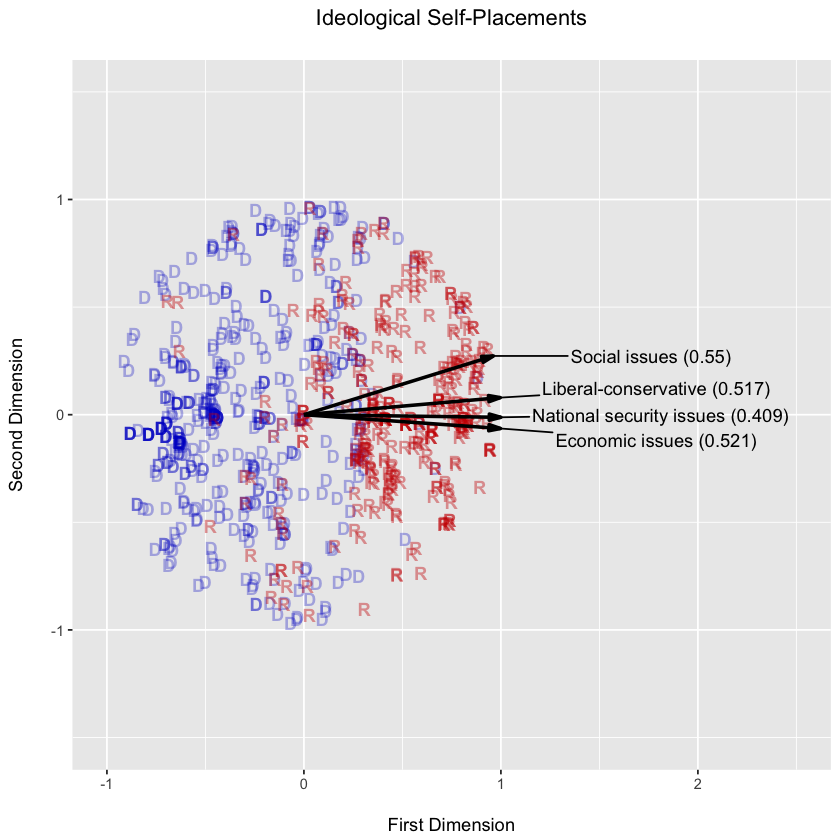

In [96]:
ggplot(data=subset(normvecs, area=="Ideology")) +
geom_text(data=subset(idealpoints.issuesvalues, partyid<=3), aes(x=coord1D, y=coord2D, label="D", fontface = "bold"), alpha=0.3, col="blue3") +
geom_text(data=subset(idealpoints.issuesvalues, partyid>=5), aes(x=coord1D, y=coord2D, label="R", fontface = "bold"), alpha=0.4, col="red3") +
geom_segment(aes(x=0, y=0, xend=normVector1D, yend=normVector2D), arrow=grid::arrow(angle=15, length=unit(0.1, "inches"), type="closed"), size=1, color="black") +
geom_text_repel(aes(x=normVector1D, y=normVector2D, label=name), nudge_x=0.8) +
xlim(-1,2.5) +
ylim(-1.5,1.5) +
xlab("\nFirst Dimension") +
ylab("Second Dimension\n") +
ggtitle("Ideological Self-Placements\n") +
theme(plot.title = element_text(hjust = 0.5))

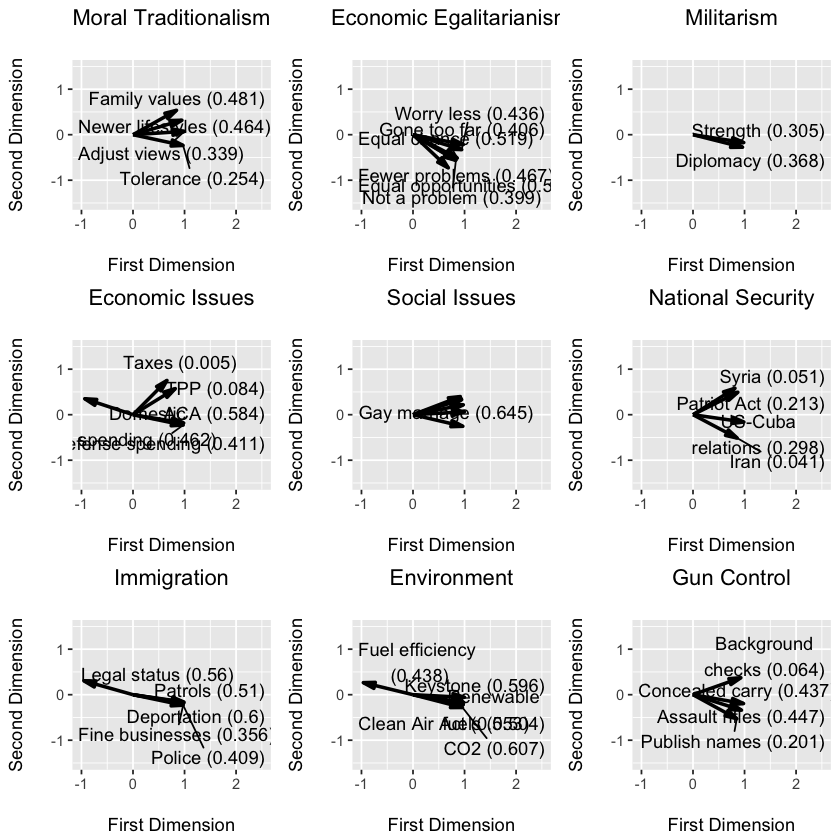

In [97]:
p1 <- ggplot(data=subset(normvecs, area=="Moral Traditionalism")) +
geom_segment(aes(x=0, y=0, xend=normVector1D, yend=normVector2D), arrow=grid::arrow(angle=15, length=unit(0.1, "inches"), type="closed"), size=1,
color="black") +
geom_text_repel(aes(x=normVector1D, y=normVector2D, label=name), nudge_x=0.8) +
xlim(-1,2.5) +
ylim(-1.5,1.5) +
xlab("\nFirst Dimension") +
ylab("Second Dimension\n") +
ggtitle("Moral Traditionalism\n") +
theme(plot.title = element_text(hjust = 0.5))
#
p2 <- ggplot(data=subset(normvecs, area=="Economic Egalitarianism")) +
geom_segment(aes(x=0, y=0, xend=normVector1D, yend=normVector2D), arrow=grid::arrow(angle=15, length=unit(0.1, "inches"), type="closed"), size=1,
color="black") +
geom_text_repel(data=subset(normvecs, area=="Economic Egalitarianism" & normVector2D > -0.3), aes(x=normVector1D, y=normVector2D, label=name), nudge_x=0.3, nudge_y=0.35) +
geom_text_repel(data=subset(normvecs, area=="Economic Egalitarianism" & normVector2D < -0.3), aes(x=normVector1D, y=normVector2D, label=name), nudge_x=0.8, nudge_y=-0.05) +
xlim(-1,2.5) +
ylim(-1.5,1.5) +
xlab("\nFirst Dimension") +
ylab("Second Dimension\n") +
ggtitle("Economic Egalitarianism\n") +
theme(plot.title = element_text(hjust = 0.5))
#
p3 <- ggplot(data=subset(normvecs, area=="Militarism")) +
geom_segment(aes(x=0, y=0, xend=normVector1D, yend=normVector2D), arrow=grid::arrow(angle=15, length=unit(0.1, "inches"), type="closed"), size=1,
color="black") +
geom_text_repel(aes(x=normVector1D, y=normVector2D, label=name), nudge_x=0.8) +
xlim(-1,2.5) +
ylim(-1.5,1.5) +
xlab("\nFirst Dimension") +
ylab("Second Dimension\n") +
ggtitle("Militarism\n") +
theme(plot.title = element_text(hjust = 0.5))
#
p4 <- ggplot(data=subset(normvecs, area=="Economic Issues")) +
geom_segment(aes(x=0, y=0, xend=normVector1D, yend=normVector2D), arrow=grid::arrow(angle=15, length=unit(0.1, "inches"), type="closed"), size=1,
color="black") +
geom_text_repel(data=subset(normvecs, area=="Economic Issues" & normVector1D > 0), aes(x=normVector1D, y=normVector2D, label=name), nudge_x=0.6) +
geom_text_repel(data=subset(normvecs, area=="Economic Issues" & normVector1D < 0), aes(x=normVector1D, y=normVector2D, label=name), nudge_x=-0.5, nudge_y=-0.6) +
xlim(-1,2.5) +
ylim(-1.5,1.5) +
xlab("\nFirst Dimension") +
ylab("Second Dimension\n") +
ggtitle("Economic Issues\n") +
theme(plot.title = element_text(hjust = 0.5))
#
p5 <- ggplot(data=subset(normvecs, area=="Social Issues")) +
geom_segment(aes(x=0, y=0, xend=normVector1D, yend=normVector2D), arrow=grid::arrow(angle=15, length=unit(0.1, "inches"), type="closed"), size=1,
color="black") +
geom_text_repel(data=subset(normvecs, area=="Social Issues" & name=="VAWA (0.012)"), aes(x=normVector1D, y=normVector2D, label=name), nudge_x=0.2, nudge_y=-0.4) +
geom_text_repel(data=subset(normvecs, area=="Social Issues" & name=="Abortion (always) (0.561)"), aes(x=normVector1D, y=normVector2D, label=name), nudge_x=0.85, nudge_y=0.15) +
geom_text_repel(data=subset(normvecs, area=="Social Issues" & name=="Abortion (20 weeks) (0.475)"), aes(x=normVector1D, y=normVector2D, label=name), nudge_x=-0.2, nudge_y=0.4) +
geom_text_repel(data=subset(normvecs, area=="Social Issues" & name=="Abortion (mandate) (0.664)"), aes(x=normVector1D, y=normVector2D, label=name), nudge_x=0.6, nudge_y=-0.45) +
geom_text_repel(data=subset(normvecs, area=="Social Issues" & name=="Abortion (funding) (0.682)"), aes(x=normVector1D, y=normVector2D, label=name), nudge_x=0.6, nudge_y=-0.25) +
geom_text_repel(data=subset(normvecs, area=="Social Issues" & name=="Gay marriage (0.645)"), aes(x=normVector1D, y=normVector2D, label=name), nudge_x=0.85, nudge_y=-0.05) +
xlim(-1,2.5) +
ylim(-1.5,1.5) +
xlab("\nFirst Dimension") +
ylab("Second Dimension\n") +
ggtitle("Social Issues\n") +
theme(plot.title = element_text(hjust = 0.5))
#
p6 <- ggplot(data=subset(normvecs, area=="Foreign Policy")) +
geom_segment(aes(x=0, y=0, xend=normVector1D, yend=normVector2D), arrow=grid::arrow(angle=15, length=unit(0.1, "inches"), type="closed"), size=1,
color="black") +
geom_text_repel(data=subset(normvecs, area=="Foreign Policy" & normVector1D > 0), aes(x=normVector1D, y=normVector2D, label=name), nudge_x=0.6) +
geom_text_repel(data=subset(normvecs, area=="Foreign Policy" & normVector1D < 0), aes(x=normVector1D, y=normVector2D, label=name), nudge_x=-0.5) +
xlim(-1,2.5) +
ylim(-1.5,1.5) +
xlab("\nFirst Dimension") +
ylab("Second Dimension\n") +
ggtitle("National Security\n") +
theme(plot.title = element_text(hjust = 0.5))
#
p7 <- ggplot(data=subset(normvecs, area=="Immigration")) +
geom_segment(aes(x=0, y=0, xend=normVector1D, yend=normVector2D), arrow=grid::arrow(angle=15, length=unit(0.1, "inches"), type="closed"), size=1,
color="black") +
geom_text_repel(data=subset(normvecs, area=="Immigration" & normVector2D > -0.10), aes(x=normVector1D, y=normVector2D, label=name), nudge_x=0.6, nudge_y=0.15) +
geom_text_repel(data=subset(normvecs, area=="Immigration" & normVector2D < -0.11), aes(x=normVector1D, y=normVector2D, label=name), nudge_x=0.7, nudge_y=-0.25) +
geom_text_repel(data=subset(normvecs, area=="Immigration" & name=="Police (0.421)"), aes(x=normVector1D, y=normVector2D, label=name), nudge_x=0.6) +
xlim(-1,2.5) +
ylim(-1.5,1.5) +
xlab("\nFirst Dimension") +
ylab("Second Dimension\n") +
ggtitle("Immigration\n") +
theme(plot.title = element_text(hjust = 0.5))
#
p8 <- ggplot(data=subset(normvecs, area=="Environment")) +
geom_segment(aes(x=0, y=0, xend=normVector1D, yend=normVector2D), arrow=grid::arrow(angle=15, length=unit(0.1, "inches"), type="closed"), size=1,
color="black") +
geom_text_repel(data=subset(normvecs, area=="Environment" & normVector2D > -0.065 & name!="Renewable\nfuels (0.524)"), aes(x=normVector1D, y=normVector2D, label=name), nudge_x=0.8, nudge_y=0.25) +
geom_text_repel(data=subset(normvecs, area=="Environment" & normVector2D < -0.065 & name!="Renewable\nfuels (0.524)"), aes(x=normVector1D, y=normVector2D, label=name), nudge_x=0.8, nudge_y=-0.4) +
geom_text_repel(data=subset(normvecs, area=="Environment" & name=="Renewable\nfuels (0.524)"), aes(x=normVector1D, y=normVector2D, label=name), nudge_x=0.85, nudge_y=0.0) +
xlim(-1,2.5) +
ylim(-1.5,1.5) +
xlab("\nFirst Dimension") +
ylab("Second Dimension\n") +
ggtitle("Environment\n") +
theme(plot.title = element_text(hjust = 0.5))
#
p9 <- ggplot(data=subset(normvecs, area=="Gun Control")) +
geom_segment(aes(x=0, y=0, xend=normVector1D, yend=normVector2D), arrow=grid::arrow(angle=15, length=unit(0.1, "inches"), type="closed"), size=1,
color="black") +
geom_text_repel(data=subset(normvecs, area=="Gun Control" & normVector2D > 0), aes(x=normVector1D, y=normVector2D, label=name), nudge_x=0.5, nudge_y=0.25) +
geom_text_repel(data=subset(normvecs, area=="Gun Control" & normVector2D < 0), aes(x=normVector1D, y=normVector2D, label=name), nudge_x=0.7, nudge_y=-0.05) +
xlim(-1,2.5) +
ylim(-1.5,1.5) +
xlab("\nFirst Dimension") +
ylab("Second Dimension\n") +
ggtitle("Gun Control\n") +
theme(plot.title = element_text(hjust = 0.5))
#
#
#pdf("Dropbox/OC_publicopinion/images/issuesvalues_normalvectors.pdf", height=14.5, width=14)
grid.arrange(p1, p2, p3, p4, p5, p6, p7, p8, p9, nrow=3)